# Линейная регрессия

Будем искать алгоритм $a(x)$ в виде: $$a(x, \theta_0, \dots, \theta_n)=\theta_0 + \theta_1  f_1(x) + \dots + \theta_n  f_n(x)$$ <br/>
Для простоты определим функцию $f_0(x)\equiv 1$, и будем отождествлять объект $x \in X$ с вектором $x \longrightarrow (f_0(x), \dots, f_n(x)) = (x_0, \dots, x_n)$

Такми образом наш алгоритм будет иметь вид: $a(x)=\hat{y}=x^T\theta$ .
Пусть дано тренировочное множество $X=\{x_1, \dots, x_l\}$, представим его в виде матрицы:
$$X=\begin{pmatrix} x_{1,0} & \dots & x_{1, n} \\ \vdots & \vdots & \vdots \\ x_{l,0} & \dots & x_{l, n}  \end{pmatrix}$$  

Известные значения в тренировочном множестве можно представить в виде вектора:
$$Y^* = \begin{pmatrix} y^*_{1}\\ \vdots \\ y^*_{l}   \end{pmatrix}$$ 

Тогда функция потерь примет вид:
$$Q(\theta)= \frac{1}{l} \sum_{i=1}^{l}(y^*_i-x_i^T\theta)^2= \frac{1}{l}(Y^*-X\theta)^T(Y^*-X\theta)$$

Продифференцируем по компонентам $\theta$, получим условие: 
$$X^T(Y^*-X\theta)=0$$ 
Затем:
$$X^T Y^*- X^T X \theta = 0$$ 
$$\theta = (X^T X)^{-1} X^T Y^* $$

### Пример 

cгенерируем 300 объектов размерности 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

l, n = 300, 1

np.random.seed(5)
X = np.random.uniform(low=0.0, high=30.0, size=(l, n))
X[:10]

array([[ 6.65979513],
       [26.12196919],
       [ 6.20157466],
       [27.55832724],
       [14.65233566],
       [18.35231589],
       [22.97723569],
       [15.55253964],
       [ 8.90401505],
       [ 5.63163686]])

Добавим к ним "искуственные" единицы, отвечающие за свободныу компоненту

In [2]:
X = np.hstack((np.ones(shape=(l, 1)), X))

In [3]:
X[:10]

array([[ 1.        ,  6.65979513],
       [ 1.        , 26.12196919],
       [ 1.        ,  6.20157466],
       [ 1.        , 27.55832724],
       [ 1.        , 14.65233566],
       [ 1.        , 18.35231589],
       [ 1.        , 22.97723569],
       [ 1.        , 15.55253964],
       [ 1.        ,  8.90401505],
       [ 1.        ,  5.63163686]])

Будет считать, что существует зависимость функцией $y = 15.4 + 7.2  x$. Сгенерируем "ответы" с добавлением нормально-распреленного шума.

In [4]:
Y = 15.4 * X[:,0] + 7.2 * X[:,1] + np.random.normal(0., 10., size=l)
Y = Y.reshape((-1, 1))
Y[:10]

array([[ 63.17699227],
       [202.20159591],
       [ 41.97217131],
       [223.75964588],
       [105.98552819],
       [134.71559959],
       [177.0790229 ],
       [127.72472414],
       [ 79.95968992],
       [ 48.31031646]])

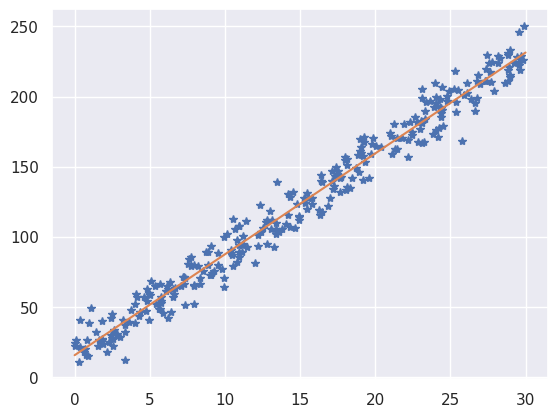

In [5]:
plt.plot(X[:,1], Y, '*')

dx = np.linspace(0, 30, 50)
dy = 15.4 + 7.2 * dx 
plt.plot(dx, dy)

plt.show()

Теперь восстановим наши коэффиценты

In [6]:
"""
theta = np.dot(np.linalg.pinv(np.dot(X.T, X)), 
               np.dot(X.T, Y)) 
"""


theta = np.linalg.inv(X.T @ X) @ X.T @ Y

In [7]:
theta

array([[15.4246964 ],
       [ 7.20311498]])

### Решение с помощью численного нахождения минимума функционала качества

$$X=\begin{pmatrix} x_{1,0} & \dots & x_{1, n} \\ \vdots & \vdots & \vdots \\ x_{l,0} & \dots & x_{l, n}  \end{pmatrix}$$  
$$Y^* = \begin{pmatrix} y_{1}^*\\ \vdots \\ y_{l}^*   \end{pmatrix}$$ 
$$Q(\theta)=  \sum_{i=1}^{l}(y_i^*-x_i^T\theta)^2= \frac{1}{l}(Y^*-X\theta)^T(Y^*-X\theta)$$

Найдем частные прозводные по коэффицентам и, соответственно, градиент

$$\frac{\partial Q}{\partial \theta_j} = 2 \sum_{i=1}^{l}(x_i^T\theta-y^*_i) x_{i,j} $$
$$grad(Q) = 2 (X \theta-Y^*)^TX $$

### Пример

Воспользуемся методам нахождения минимума из библиотеки `scipy`

In [8]:
import scipy as sp

def func_to_min(theta):
    theta = theta.reshape((-1, 1))
    return np.sum((X @ theta - Y) ** 2)    


def func_grad(theta):
    theta = theta.reshape((-1, 1))
    return (X @ theta - Y).T @ X
   

sp.optimize.fmin_tnc(func_to_min, np.array([1., 1.]), func_grad) 
sp.optimize.fmin_l_bfgs_b(func_to_min, np.array([1., 1.]), func_grad, approx_grad=False)
#help(sp.optimize.fmin_l_bfgs_b)

  NIT   NF   F                       GTG
    0    1  4.355344283379974E+06   3.88738848E+11
tnc: fscale = 8.01938e-07
    1    3  4.381358098269544E+04   1.13725296E+06
tnc: fscale = 0.000468858
    2    5  2.884341336210541E+04   4.55994836E+06
    3    7  2.879266720520541E+04   1.05866577E-08
tnc: fscale = 4859.49
tnc: |fn-fn-1] = 0 -> convergence
    4   15  2.879266720520541E+04   2.38629451E-09
tnc: Converged (|f_n-f_(n-1)| ~= 0)


(array([15.4246964 ,  7.20311498]),
 28792.667205205376,
 {'grad': array([[3.01476533e-09, 6.27738928e-09]]),
  'task': 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'funcalls': 11,
  'nit': 6,
  'warnflag': 0})

Можно визуализировать функцию потерь и от параметров в трехмерном пространстве

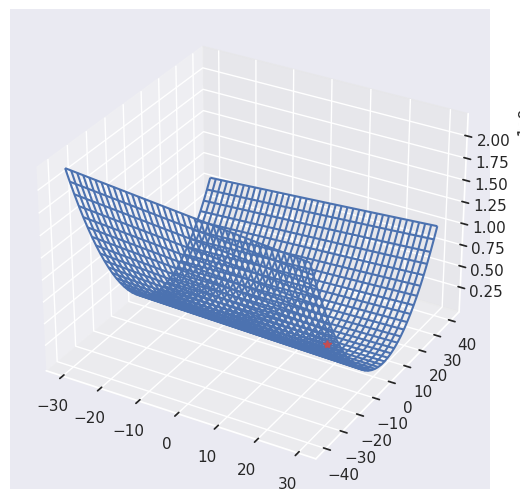

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig,  auto_add_to_figure=False)
fig.add_axes(ax)

dx = np.linspace(-30, 30, 40)
dy = np.linspace(-40, 40, 40)
dX, dY = np.meshgrid(dx, dy)

dZ = np.array([func_to_min(np.array([x, y])) for x, y in zip(dX.ravel(), dY.ravel())])
dZ = dZ.reshape((-1, 40))
ax.plot3D([15.4], [7.2], func_to_min(np.array([15.4, 7.2])), 'r*')
ax.plot_wireframe(dX, dY, dZ)


# Регуляризация

Если матрицы $X^TX$ вырождена, то столбцы матрицы $X$ линейно зависимы. Это фактически означает, что некоторые признаки линейно зависимы друг от друга и их нужно отбросить. Чаще возникакет проблема *мультиколлинеарности*, когда $X^TX$ близка к некоторой матрице неполного ранга, что влечет за собой неустойчивость решения и переобучение. 

Для решения этой проблемы можно добавить к функционалу $Q$ регуляризатор, штрафующий за большие абсолютные значения компонентов вектора $\theta$
$$Q(\theta) = (Y^*-X\theta)^T(Y^*-X\theta) + \alpha \theta^T \theta$$

Параметр $\alpha$ определяет "значимость штрафоного слагаемого".  В таком виде мы можем найти решение аналитически:

Продифференцируем по компонентам $\theta$, получим условие: 
$$X^T(Y^*-X\theta) + \alpha\theta=0$$ 
Затем:
$$X^T Y^*- X^T X \theta + \alpha\theta= 0$$ 
$$\theta = (X^T X + \alpha I_n)^{-1} X^T Y^* $$

In [10]:
import ipywidgets

%matplotlib inline

l, n = 6, 1

np.random.seed(25)
X = np.random.uniform(low=0.0, high=5.0, size=(l, n))
X = np.hstack((np.ones((l, 1)),                 
               X, 
               X**2,
               X**3,
               X**4,
               X**5
              ))
            
Y = 15.4 + 7.2 * X[:,1] + np.random.normal(0., 50., size=l)


def solve(alpha):
    theta = np.linalg.inv(X.T @ X + alpha * np.identity(6)) @ X.T @ Y
    plt.plot(X[:,1], Y, '*')

    dx = np.linspace(-2, 6, 300)
    dy = theta[0] 
    for i in range(1, 6):
        dy += theta[i] * (dx ** i)
     
    plt.plot(dx, 15.4 + 7.2 * dx)
    plt.plot(dx, dy)    
    
    plt.xlim((-2, 6))
    plt.ylim((-100, 100))
    
    plt.show()
    
ipywidgets.interactive(solve, alpha=ipywidgets.FloatSlider(min=0., max=30., step=0.1, value=0.1))

interactive(children=(FloatSlider(value=0.1, description='alpha', max=30.0), Output()), _dom_classes=('widget-…

# Дилемма смещения–дисперсии (Bias–variance tradeoff)

Компромисс отклонение-дисперсия -- свойство моделей, когда модели с меньшим отклонением от имеющихся данных имеют более высокую дисперсию, и наоборот. 

*Смещение (bias)* -- это ошибка, возникающая в результате ошибки  модели (недообучение, underfitting).

*Дисперсия (variance)* -- чувствительность к малым отклонениям в тренировочном наборе (переобучение, overfitting).


Для примера сгенерируем одномерный набор данных и построим три линейных модели без регуляризации:
- не учитывая признак
- учитывая признак
- добавляем новые признаки - степени от существующего


In [29]:
import pandas as pd
l, n = 10, 1

df = pd.DataFrame()
df['x0'] = np.ones(l)
# значения признаков
df['x1'] = np.linspace(0, 1, l) 

#добавляем `полиномиальные` признаки
for p in range(2, 9):
    df[f'x{p}'] = df['x1'] ** p
        
#df['x2'] = df['x1'] ** 2
#df['x3'] = df['x1'] ** 3
#df['x4'] = df['x1'] ** 3

def true_func(x):
    return 5 * x + 3.0 

df['y'] = true_func(df['x1']) + np.random.normal(0.0, 2., size=l)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,y
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.305914
1,1.0,0.111111,0.012346,0.001372,0.000152,0.000017,0.000002,2.090752e-07,2.323057e-08,0.886233
2,1.0,0.222222,0.049383,0.010974,0.002439,0.000542,0.000120,2.676162e-05,5.947027e-06,4.263870
3,1.0,0.333333,0.111111,0.037037,0.012346,0.004115,0.001372,4.572474e-04,1.524158e-04,2.174488
4,1.0,0.444444,0.197531,0.087791,0.039018,0.017342,0.007707,3.425487e-03,1.522439e-03,7.626767


Отобразим исходные данные

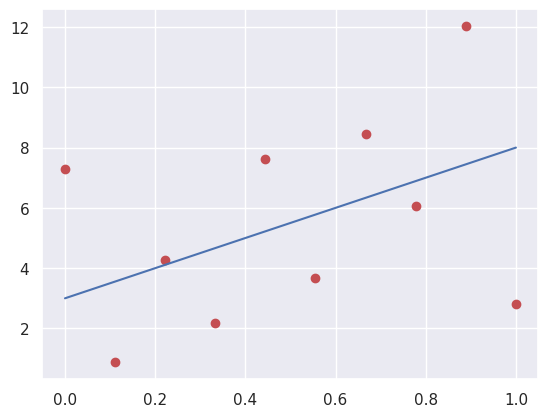

In [30]:
plt.plot(df['x1'], true_func(df['x1']))
plt.scatter(df['x1'], df['y'], c='r')

Решение

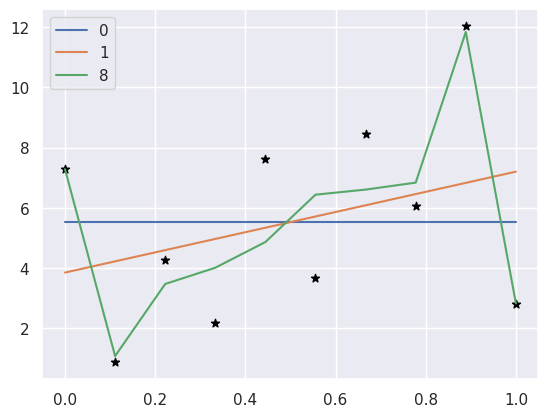

In [31]:
def solve_lr_simple(X, Y):
    return np.linalg.pinv(X.T @ X) @ X.T @ Y


X0 = df[['x0']]
coef0 = solve_lr_simple(X0.values, df['y'].values)

X1 = df[['x0', 'x1']]
coef1 = solve_lr_simple(X1.values, df['y'].values)

X8 = df[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
coef8 = solve_lr_simple(X8.values, df['y'].values)

plt.scatter(df['x1'], df['y'], marker='*', c='black')
plt.plot(df['x1'], X0.values @ coef0.T, label='0')
plt.plot(df['x1'], X1.values @ coef1.T, label='1')
plt.plot(df['x1'], X8.values @ coef8.T, label='8')
plt.legend()

Видно, что в случае дополнительных 'полиномиальных признаков' мы переобучуемся

Математически можно вывести зависимость так:

$$y^* = f(x) + \varepsilon$$

$$\operatorname{E}\big[(y^* - a(x))^2\big]  = (f-\operatorname{E}[a(x)])^2+\operatorname{Var}[\varepsilon]+\operatorname{Var}\big[a(x)\big]\\[5pt]
 $$